# Segmenting and Clustering Neighborhoods in Toronto
In this assignment, you will be required to explore, segment, and cluster the neighborhoods in the city of Toronto. However, unlike New York, the neighborhood data is not readily available on the internet. What is interesting about the field of data science is that each project can be challenging in its unique way, so you need to learn to be agile and refine the skill to learn new libraries and tools quickly depending on the project.

For the Toronto neighborhood data, a Wikipedia page exists that has all the information we need to explore and cluster the neighborhoods in Toronto. You will be required to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format like the New York dataset.

Once the data is in a structured format, you can replicate the analysis that we did to the New York City dataset to explore and cluster the neighborhoods in the city of Toronto.

Your submission will be a link to your Jupyter Notebook on your Github repository.

https://www.coursera.org/learn/applied-data-science-capstone/peer/I1bDq/segmenting-and-clustering-neighborhoods-in-toronto


For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

**Question 1: Start by creating a new Notebook for this assignment.**

**Question 2: Use the Notebook to build the code to scrape the following Wikipedia page** 

> https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below

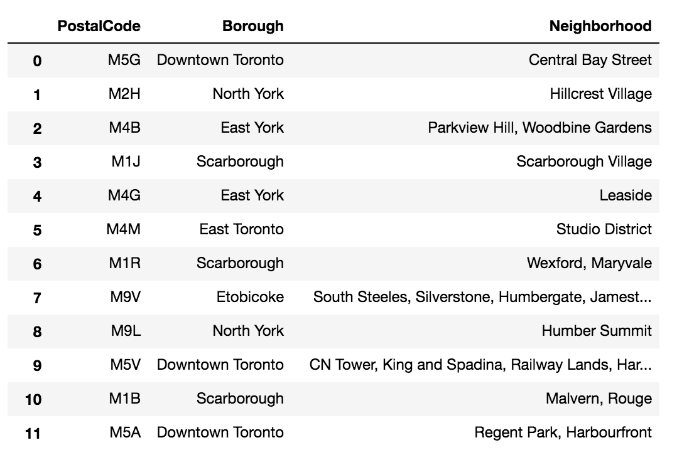

In [6]:
import pandas as pd 
import wikipedia as wp
from bs4 import BeautifulSoup

In [7]:
#load data 
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

**Question 3: To create the above dataframe:**
The dataframe will consist of three columns: 
* PostalCode, Borough, and Neighborhood 

* Only process the cells that have an assigned borough. 
* Ignore cells with a borough that is Not assigned.
* More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
* If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

* Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.

* In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [30]:
# Index and ignore cells with a borough that is Not assigned
df = pd.read_html(html, header=0)[0]
df = df[df.Borough !="Not assigned"]

Since more than one neighborhood can exist in one postal code area we need to group into one row with neighborhoods separated

In [31]:
df = df.groupby(['Postal code', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

In [32]:
# Create a loop so that if a cell has a borough Na neighborhood, the neighborhood will be the same as the borough
for index, row in df.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']
df.head(13)

,Postal code,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


In [35]:
#In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
df.shape

(103, 3)